In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Step 1: Generate Non-linear Data
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [19]:
# Step 2: Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

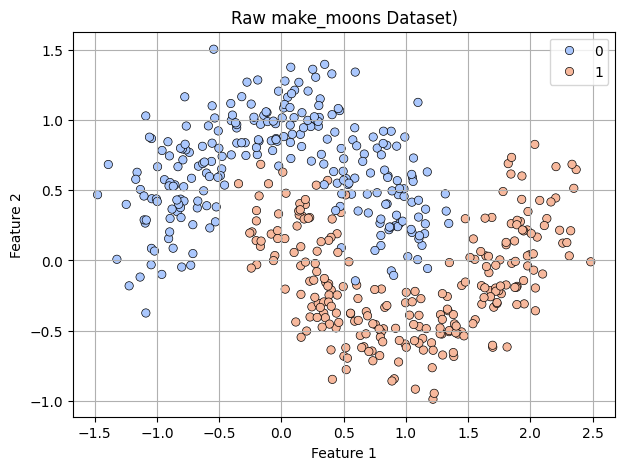

In [21]:
# Visualize the original dataset before training
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title("Raw make_moons Dataset)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# Step 4: Grid search over C and gamma for RBF kernel
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

In [22]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(" Best Parameters from GridSearchCV:")
print(grid_search.best_params_)
print(" Best Cross-Validation Score:", grid_search.best_score_)

 Best Parameters from GridSearchCV:
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
 Best Cross-Validation Score: 0.975


In [24]:
# Step 5: Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🧪 Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix:
[[49  1]
 [ 1 49]]


In [16]:
# Step 6: Decision Boundary Plot Function
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

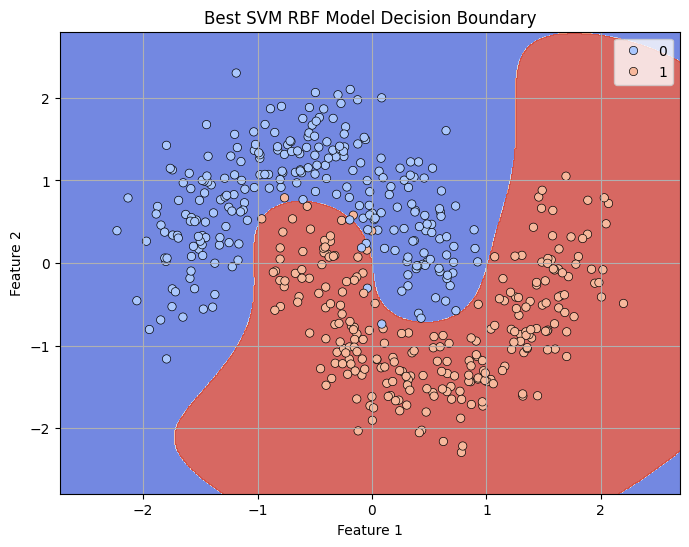

In [17]:
# Step 7: Visualize decision boundary of best model
plot_decision_boundary(best_model, X_scaled, y, "Best SVM RBF Model Decision Boundary")

Polynomial Kernel SVM Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        50
           1       0.81      0.92      0.86        50

    accuracy                           0.85       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100

Confusion Matrix:
[[39 11]
 [ 4 46]]


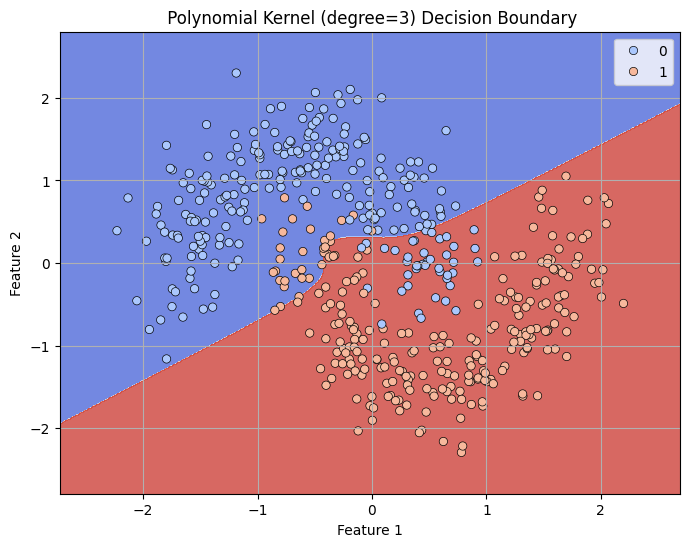

In [27]:
# Train a Polynomial Kernel SVM
poly_svm = SVC(kernel='poly', degree=3, C=1.0)
poly_svm.fit(X_train, y_train)

# Predict and evaluate
y_poly_pred = poly_svm.predict(X_test)

print("Polynomial Kernel SVM Report:")
print(classification_report(y_test, y_poly_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_poly_pred))

# Plot decision boundary
plot_decision_boundary(poly_svm, X_scaled, y, " Polynomial Kernel (degree=3) Decision Boundary")


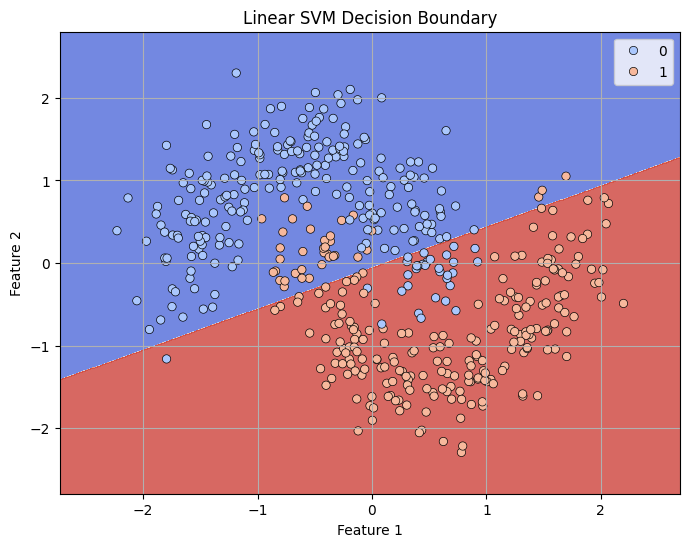

In [18]:
# Train a linear SVM for comparison
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)

# Visualize decision boundary of Linear SVM
plot_decision_boundary(linear_svm, X_scaled, y, "Linear SVM Decision Boundary")